# Stage3 深層学習day1 
## 深層学習day1
### 0、はじめに（ニューラルネットワーク全体像）
####  入力層から入力されたデータを中間層を経由して出力層に出力するデータ
####  する際、目的の値になるように重み(W),バイアス(b)を使った変換すること。
####  どのように変換(活性関数）するか、入力数は、いくつにするかは人間が
####  指定（ハイパーパラメータ）する。

#### 0.3 確認テスト
##### 確認テスト①-1：ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。
##### 解答：
##### &emsp;&emsp;多層のニューラルネットワークを用いて、入力値から目的の出力値を
##### &emsp;&emsp;得られるように変換する、数学的モデルを構築すること。
##### 確認テスト①-2：また、次の中のどの値の最適化が最終目的か。
##### 解答：③重み[W]④バイアス[b]

##### 確認テスト②：次のネットワークを紙にかけ。入力層︓2ノード1層中間層︓３ノード2層出力層︓1ノード1層
##### 解答：

In [15]:
# IPythonのインポート
from IPython.display import Image
# ネット画像のurlを直接開いて表示
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/IMG-0453b.jpg')

###  １、Section1：入力層～中間層
####  &emsp;&emsp; 1.1　要点まとめ

#####  &emsp;&emsp;ニューラルネットワークは入力層から中間層(隠れ層）と通して活性関数を使い
#####  &emsp;&emsp;出力層に目的に値を出す。
### &emsp;&emsp;&emsp;&emsp;$ z= f(u)$ 
### &emsp;&emsp;&emsp;&emsp;  $ u= w_1 x_1 + w_2 x_2 + \cdots +w_I x_I + b $
##### &emsp;&emsp; 入力: x_i
##### &emsp;&emsp; 重み：w_i
##### &emsp;&emsp; バイアス：b
##### &emsp;&emsp; 総入力：u
##### &emsp;&emsp; 出力:z
##### &emsp;&emsp; 活性化関数:f



####  &emsp;&emsp; 1.2　実装演習結果と考察 (1_1_forward_propagation.ipynb)
####  &emsp;&emsp; 1.2.1　実装演習結果 (1_1_forward_propagation.ipynb)

In [ ]:
import os 
# 絶対パスを取得
folder = os.getcwd()

#絶対パスの表示

In [20]:
##### GCP用の設定
#### from google.colab import drive
#### drive.mount('/content/drive')

###  sys.pathの設定
import sys
#### Path変更
### sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

#####  importと関数定義
import numpy as np

## print(sys.path)
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

### 順伝播（単層・単ユニット）
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = 0.5

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1]
 [0.2]]

*** バイアス ***
0.5

*** 入力 ***
[2 3]

*** 総入力 ***
[1.3]

*** 中間層出力 ***
[1.3]



In [22]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)


#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)

*** 重み ***
[[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]

*** バイアス ***
[0.1 0.2 0.3]

*** 入力 ***
[ 1.  5.  2. -1.]

*** 総入力 ***
[1.4 2.2 3. ]

*** 中間層出力 ***
[0.80218389 0.90024951 0.95257413]



In [23]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


In [24]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4, 0.7, 1.0],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2, 0.3, 0.4])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4 0.7 1. ]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29 3.56 4.83]

*** 出力1 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

出力合計: 1.0

##### 結果表示 #####
*** 出力 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

*** 訓練データ ***
[0 0 0 1]

*** 誤差 ***
0.3234202933601941



In [21]:
## 回帰（2-3-2ネットワーク）

# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4.])
# 誤差
loss = functions.mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[1.02 2.29]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[1.02 2.29]

*** 訓練データ ***
[2. 4.]

*** 誤差 ***
0.9711249999999999



In [25]:
## 2値分類（2-3-1ネットワーク）
# 2値分類
# 2-3-1ネットワーク

# ！試してみよう_ノードの構成を 5-10-1 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.2],
        [0.4],
        [0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1])
    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = functions.sigmoid(u2)
            
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1


# 入力値
x = np.array([1., 2.])
# 目標出力
d = np.array([1])
network =  init_network()
y, z1 = forward(network, x)
# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.94]

*** 出力1 ***
[0.87435214]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[0.87435214]

*** 訓練データ ***
[1]

*** 誤差 ***
0.13427195993720972



####  &emsp;&emsp; 1.2.2　実装演習考察 (1_1_forward_propagation.ipynb)
##### ハンズオン中の試してみようを実施しました。

In [27]:
#####  importと関数定義
import numpy as np

### 順伝播（単層・単ユニット）
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])
## 試してみよう_配列の初期化
W1 = np.zeros(2)
W2 = np.ones(2)
W3 = np.random.rand(2)
W4 = np.random.randint(5, size=(2))
print ("##### 順伝播（単層・単ユニット） ## 試してみよう_配列の初期化 ## ","\n")
print("## ([[0.1], [0.2]]) ##","\n" , W,"\n" )
print("## np.zeros(2) ##","\n" , W1,"\n" )
print("## np.ones(2) ##","\n" , W2,"\n" )
print("## np.random.rand(2) ##","\n" , W3,"\n" )
print("## np.random.randint(5, size=(2)) ##","\n" , W4,"\n" )

# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

## 試してみよう_配列の初期化
W5 = np.zeros((4,3))
W6 = np.ones((4,3))
W7 = np.random.rand(4,3)
W8 = np.random.randint(5, size=(4,3))

print ("##### 順伝播（単層・複数ユニット） ## 試してみよう_配列の初期化 ## ","\n")

print("## np.zeros((4,3)) ##","\n" , W5,"\n" )
print("## np.ones((4,3)) ##","\n" , W6,"\n" )
print("## np.random.rand(4,3) ##","\n" , W7,"\n" )
print("## np.random.randint(5, size=(4,3)) ##","\n" , W8,"\n" )


##### 順伝播（単層・単ユニット） ## 試してみよう_配列の初期化 ##  

## ([[0.1], [0.2]]) ## 
 [[0.1]
 [0.2]] 

## np.zeros(2) ## 
 [0. 0.] 

## np.ones(2) ## 
 [1. 1.] 

## np.random.rand(2) ## 
 [0.35000898 0.61458499] 

## np.random.randint(5, size=(2)) ## 
 [4 3] 

##### 順伝播（単層・複数ユニット） ## 試してみよう_配列の初期化 ##  

## np.zeros((4,3)) ## 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

## np.ones((4,3)) ## 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

## np.random.rand(4,3) ## 
 [[0.95179321 0.09619092 0.81833851]
 [0.0214975  0.37072592 0.18192888]
 [0.76008679 0.77280449 0.26975711]
 [0.55260859 0.47013567 0.72131307]] 

## np.random.randint(5, size=(4,3)) ## 
 [[2 4 4]
 [0 0 1]
 [1 4 3]
 [4 4 1]] 



In [ ]:
##### ノード構成の変更について"回帰（2-3-2ネットワーク）"で実施した結果を示す。
##### 重み(W)とバイアス(b)の行列構成を変更することになる。
##### 入力値及び、目標出力も変更が必要。。

In [28]:
###  sys.pathの設定
import sys
#### Path変更
### sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
#####  importと関数定義
import numpy as np

## print(sys.path)
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")
## 回帰（2-3-2ネットワーク）

# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5, 0.6 ,0.7],
        [0.2, 0.4, 0.6, 0.8 ,0.9],
        [0.1, 0.2, 0.3, 0.4 ,0.5]
    ])
    network['W2'] = np.array([
        [0.1, 0.4 ,0.1,0.1],
        [0.2, 0.5 ,0.2,0.1],
        [0.3, 0.6 ,0.3,0.1],
        [0.1 ,0.2 ,0.2,0.1],
        [0.2 ,0.3 ,0.3,0.1]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3,0.4,0.5])
    network['b2'] = np.array([0.1, 0.2, 0.3,0.4])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2. ,3.0])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4. , 6. ,8.])
# 誤差
loss = functions.mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5 0.6 0.7]
 [0.2 0.4 0.6 0.8 0.9]
 [0.1 0.2 0.3 0.4 0.5]]

*** 重み2 ***
[[0.1 0.4 0.1 0.1]
 [0.2 0.5 0.2 0.1]
 [0.3 0.6 0.3 0.1]
 [0.1 0.2 0.2 0.1]
 [0.2 0.3 0.3 0.1]]

*** バイアス1 ***
[0.1 0.2 0.3 0.4 0.5]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[0.9 1.9 2.9 3.8 4.5]

*** 中間層出力1 ***
[0.9 1.9 2.9 3.8 4.5]

*** 総入力2 ***
[2.72 5.36 3.75 1.8 ]

*** 出力1 ***
[2.72 5.36 3.75 1.8 ]

出力合計: 14.0

##### 結果表示 #####
*** 中間層出力 ***
[0.9 1.9 2.9 3.8 4.5]

*** 出力 ***
[2.72 5.36 3.75 1.8 ]

*** 訓練データ ***
[2. 4. 6. 8.]

*** 誤差 ***
5.733812500000001



####  &emsp;&emsp; 1.3　確認テスト
##### 確認テスト①　この図式に動物分類の実例を入れてみよう。

In [14]:
# IPythonのインポート
from IPython.display import Image

# ネット画像のurlを直接開いて表示
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/IMG-0454b.jpg')

##### 確認テスト②この数式をPythonで書け。　&emsp;&emsp; $ u = w_1 x_1 +w_2 x_2 +w_3 x_3 +w_4 x_4 +b $   $   = W x +b  $
#####  &emsp;解答：u1 = np.dot(x, W1) + b1
   
##### 確認テスト③： 確認テスト1-1のファイルから中間層の出力を定義しているソースを抜き出せ。
######  &emsp; &emsp; (ビデオの問題では順伝播（3層・複数ユニット）で解説されてました。)
######  &emsp; &emsp; 中間層出力 :　$ z ^{(l)} = f ^{(l)} ( u^{(l)} ) $
######  &emsp;&emsp;&emsp;&emsp;  $ f ^{(l)} ( u^{(l)} ) $は活性化関数
#####  &emsp;解答：

| 順伝播（単層・単ユニット） | 順伝播（単層・複数ユニット） | 順伝播（3層・複数ユニット） | 回帰（2-3-2ネットワーク） | 2値分類（2-3-1ネットワーク）|
| :---: | :---: | :---: | :---: | :---: |
|   中間層出力 | 中間層出力 | 1層の総出力 | 隠れ層の総出力 | 隠れ層の総出力 |
|  z = functions.relu(u) | z = functions.sigmoid(u) | z1 = functions.relu(u1) | z1 = functions.relu(u1) | z1 = functions.relu(u1) |


### ２、Section2：活性化関数
####  &emsp;&emsp; 2.1　要点まとめ
####  &emsp;&emsp;&emsp;　ニューラルネットワークの変換の流れ
#####  &emsp;&emsp; &emsp;&emsp; Step1：「重み(Weight)」を掛け算する　（1つ目の変換）
#####  &emsp;&emsp; &emsp;&emsp; Step2：「ニューロンの値」を足し算(bias)する　（2つ目の変換）
#####  &emsp;&emsp; &emsp;&emsp; Step3：「活性化関数」による変換を行う （3つ目の変換）
#####  



####  &emsp;&emsp; 中間層用活性化関数


| **中間層用活性化関数** | 
| :--- | 
| ステップ関数  | 
|  シグモイド（ロジスティック）関数 |
| ReLU関数 | 

##### &emsp;&emsp;&emsp;
####  &emsp;&emsp; 出力層用活性化関数

| **出力層用活性化関数** | 
| :--- | 
| ソフトマックス関数| 
| 恒等写像 | 
| シグモイド関数（ロジスティック関数） |

#### &emsp;&emsp; 活性化関数: ステップ関数
#### 

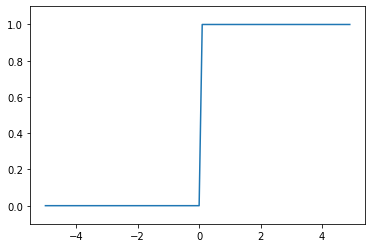

In [2]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0,dtype=np.int)

x=np.arange(-5.0 ,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y-axis
plt.show()

#### &emsp;&emsp; 活性化関数: シグモイド関数
#### 

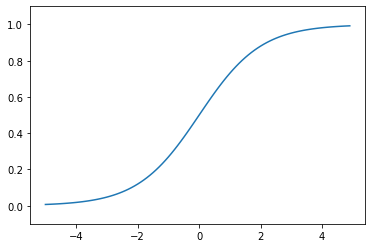

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#x= np.arrary([-1.0,1.0,2.0])
#print(x)
#print(sigmoid(x))


x=np.arange(-5.0 ,5.0,0.1)
# y=step_function(x)
y =sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1) # y-axis
plt.show()


#### &emsp;&emsp; 活性化関数: ReLU関数

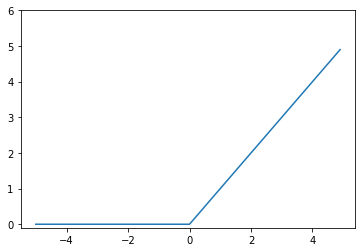

In [4]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0,dtype=np.int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)


x=np.arange(-5.0 ,5.0,0.1)

y = relu(x)

plt.plot(x,y)
plt.ylim(-0.1,6.0) # y-axis
plt.show()

####  &emsp;&emsp; 2.2　実装演習結果と考察

In [4]:
# 順伝播（3層・複数ユニット）設定を追加
## ビデオ内の実習から、該当箇所を抜き出し。
##　path , def ,import追加

###  sys.pathの設定
import sys
#### Path変更
### sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
#####  importと関数定義
import numpy as np

## print(sys.path)
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


####  &emsp;&emsp; 2.3　確認テスト
##### &emsp;&emsp;確認テスト①　線形と非線形の違いを図にかいて簡易に説明せよ。


##### &emsp;&emsp;確認テスト②配布されたソースコードより該当する箇所を抜き出せ。
#####  &emsp;&emsp;&emsp;解答：u1 = np.dot(x, W1) + b1
   


###  ３、Section3：出力層
####  &emsp;&emsp; 3.1　要点まとめ
#### &emsp;&emsp;&emsp; 3.1.1 出力層の役割
#### &emsp;&emsp;&emsp; 中間層は、その後の次の層の入力層として適切なものを出力していくのに対して
#### &emsp;&emsp;&emsp; 出力層は、人間が欲しいデータを出して欲しいデータを出してほしい。
#### &emsp;&emsp;&emsp;&emsp;例えば分類問題の場合は、各クラスの確率（犬の確率、猫の確率）が欲しい内容になる。
#### &emsp;&emsp;&emsp; 3.1.2 誤差関数
##### &emsp;&emsp;&emsp;&emsp;ニューラルネットワークを学習させるには、どうやって学習させるのか。
##### &emsp;&emsp;&emsp;&emsp;入力データと訓練データ（正解値, ラベル）をぺーアを用意する。
#####  &emsp;&emsp;&emsp;&emsp; 入力データ、例えば、身長、体重、眉間の長さなど。
#####  &emsp;&emsp;&emsp;&emsp;画像の識別の場合、各画像のピクセル値、赤が、青、緑を受け取り、
#####  &emsp;&emsp;&emsp;&emsp;この画像が犬、猫、を回答。ラベルを用意して対応する。
#####  &emsp;&emsp;&emsp;&emsp;実際の学習の場合、まずはニューラルネットワークにデータを渡す。
#####  &emsp;&emsp;&emsp;&emsp;ニューラルネットワークは自分のやりたいやり方で適当に変換を行う。
#####  &emsp;&emsp;&emsp;&emsp;色々変換をかけた後、この絵はは犬っぽい、猫っぽいと出力してくる。
#####  &emsp;&emsp;&emsp;&emsp;その結果と正解のラベルと比較し、どのくらいあったいたか表現する。
##### &emsp;&emsp;&emsp;&emsp;これを$ 誤差関数 $という。

#### &emsp;&emsp;&emsp; 3.1.3 誤差関数の種類
##### &emsp;&emsp;&emsp;&emsp;二乗誤差（平均二乗誤差）&emsp;：回帰問題で使用される。&emsp;&emsp; $　E_n(w) = \frac{1}{2} \sum _{i=1} ^{I} {(y_n - d_n )^2 } $
##### &emsp;&emsp;&emsp;&emsp;クロスエントロピー&emsp;&emsp;&emsp;&emsp;：分類問題で使用される。&emsp;&emsp; $　E_n(w) = - \sum _{i=1} ^{I} {d_i \log y_i } 　$
#### &emsp;&emsp;&emsp; 3.1.4 出力層の活性化関数
|| 回帰 | 二値分類 | 多値分類 | 
| :---: | :---: | :---: | :---: | 
|  活性化関数 | 恒等関数 | シグモイド関数 | ソフトマックス関数 |
|  誤差関数 | 二乗誤差 |クロスエントロピー | クロスエントロピー |

##### &emsp;&emsp;&emsp;恒等関数：何もしない（そのまま出力する）関数

####  &emsp;&emsp; 3.2　実装演習結果と考察

####   &emsp;&emsp; 誤差関数
####  &emsp;&emsp;&emsp;&emsp;２値分類の場合
####  &emsp;&emsp;&emsp;&emsp; loss = functions.cross_entropy_error(d, y)
####  &emsp;&emsp;&emsp;&emsp;回帰の場合
####  &emsp;&emsp;&emsp;&emsp; loss = functions.mean_squared_error(d, y)
#### 実際のハンズオンは以下を参照ください。

In [9]:
# 順伝播（3層・複数ユニット）設定を追加
## ビデオ内の実習から、該当箇所を抜き出し。
##　path , def ,import追加

###  sys.pathの設定
import sys
#### Path変更
### sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')


# importと関数定義

!pip3 install functions
import numpy as np
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = np.array(0.5)

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3,0], 
    [0.2, 0.3, 0.4, 0.5], 
    [0.3, 0.4, 0.5, 1],
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)

#  総入力
u = np.dot(W, x) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)


# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    input_layer_size = 3
    hidden_layer_size_1=10
    hidden_layer_size_2=5
    output_layer_size = 4
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size_1)
    network['W2'] = np.random.rand(hidden_layer_size_1,hidden_layer_size_2)
    network['W3'] = np.random.rand(hidden_layer_size_2,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size_1)
    network['b2'] =  np.random.rand(hidden_layer_size_2)
    network['b3'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("中間層出力2", z2)
    print_vec("総入力2", u2)
    print_vec("出力", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1, z2

# 入力値
x = np.array([1., 2., 4.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)

*** 中間層出力 ***
[1.3]
shape: (1,)

*** 重み ***
[[0.1 0.2 0.3 0. ]
 [0.2 0.3 0.4 0.5]
 [0.3 0.4 0.5 1. ]]
shape: (3, 4)

*** バイアス ***
[0.1 0.2 0.3]
shape: (3,)

*** 入力 ***
[ 1.  5.  2. -1.]
shape: (4,)

*** 総入力 ***
[1.8 2.2 2.6]
shape: (3,)

*** 中間層出力 ***
[0.85814894 0.90024951 0.93086158]
shape: (3,)

*** 入力 ***
[1. 2. 4.]
shape: (3,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.76967743 0.31240939 0.94277625 0.53496738 0.86279367 0.36944342
  0.6264628  0.33477333 0.90512665 0.40353949]
 [0.11018225 0.0420486  0.16556105 0.58989207 0.63611806 0.28404589
  0.34890677 0.94500466 0.06051156 0.28499393]
 [0.51546966 0.32234196 0.57574802 0.33222331 0.8442077  0.95137811
  0.4273746  0.76574563 0.445836   0.489662  ]]
shape: (3, 10)

*** 重み2 ***
[[0.4077381  0.69442721 0.43769466 0.69302369 0.7382752 ]
 [0.83921983 0.77059218 0.42675214 0.74639131 0.20080183]
 [0.654203

In [10]:
np.random.rand(3, 3)


array([[0.18148075, 0.94030658, 0.290825  ],
       [0.66777191, 0.25613312, 0.25402958],
       [0.61092418, 0.74656723, 0.47854378]])

In [13]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-6 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    
    input_layer_size = 3
    hidden_layer_size=50
    output_layer_size = 6
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1


## 事前データ
# 入力値
x = np.array([1., 2.,  3.])

# 目標出力
d = np.array([0, 0, 0, 1, 0, 0])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.52062912 0.11958932 0.2206954  0.24225122 0.78846405 0.51136388
  0.55352178 0.30972392 0.59137455 0.56829092 0.49447023 0.92289683
  0.07947048 0.66785471 0.12134861 0.34487022 0.51331853 0.62907894
  0.54911612 0.79919295 0.9713755  0.37551209 0.34736211 0.17114829
  0.99539676 0.49479772 0.14791853 0.07893873 0.70978467 0.64858081
  0.0103375  0.66466217 0.40042464 0.63117618 0.03843473 0.04008601
  0.51759955 0.0070894  0.0706522  0.72649995 0.90756092 0.36256051
  0.51158368 0.01391437 0.89459459 0.87079207 0.7410311  0.65778982
  0.60841634 0.83646959]
 [0.77059287 0.46022103 0.08881875 0.20781848 0.17291765 0.64389278
  0.79309087 0.58313178 0.33338021 0.75259598 0.88654001 0.51659984
  0.5164083  0.38504557 0.2469463  0.50855795 0.6864688  0.34981389
  0.23057215 0.63104893 0.00777387 0.9947255  0.67088485 0.10025376
  0.54132718 0.82644563 0.64749047 0.63751627 0.20870659 0.1715735
  0.98927128 0.92310663 0.83548621 0.70681974 0.13226788 

####  &emsp;&emsp; 3.3　確認テスト
##### &emsp;&emsp; 　確認テスト①（ソフトマックス関数）
##### 質問・なぜ、引き算でなく二乗するか述べよ
##### 解答： &emsp;&emsp;     　誤差関数を求める場合　引き算だと誤差が＋, －両方有ると相殺されて、正しい結果が得られない。
##### &emsp;&emsp; &emsp;&emsp; 二乗することで、誤差が必ず＋となるため誤差の総和を求めた場合、
##### &emsp;&emsp; &emsp;&emsp;正しく誤差を評価出来るため。
　　　
##### 質問・下式の1/2はどういう意味を持つか述べよ
##### 解答：　　２乗誤差計算時、微分計算を行う。その場合、下記のようになる。
##### &emsp;&emsp; &emsp;&emsp;  $ {(x^2)}^{\prime} = 2x $ 
##### &emsp;&emsp; &emsp;&emsp;  微分結果が2xとなるため、2 x $ \frac{1}{2} $ =1にするため。

##### &emsp;&emsp;確認テスト②(活性化関数)
###### &emsp;&emsp; &emsp;①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
###   &emsp;&emsp;&emsp;$ f(i,u) = \frac{e^{u_i}}{\sum _{k=1} ^{k}e^{u_k} } $
#####  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;①$ f(i,u) $
#####  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;②$ e^{u_i} $
#####  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;③$ \sum _{k=1} ^{k}e^{u_k}  $
#####  以下のpython progから確認
##### # ソフトマックス関数
$
##### def softmax(x):
#####     if x.ndim == 2:
#####         x = x.T
#####        x = x - np.max(x, axis=0)
#####        y = np.exp(x) / np.sum(np.exp(x), axis=0)
#####        return y.T
#####
#####    x = x - np.max(x) # オーバーフロー対策
#####    return np.exp(x) / np.sum(np.exp(x))
#####   ①：y
#####   ②：np.exp(x)
#####   ③： np.sum(np.exp(x), axis=0)
$

##### &emsp;&emsp;確認テスト②(交差エントロピー)
##### &emsp;&emsp;&emsp;&emsp;①~②の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
##### &emsp;&emsp;①$ E_n(w) $
##### &emsp;&emsp;②$ - { \sum _{i=1} ^{I} d_i \log y_i } $

##### # クロスエントロピー
$
##### def cross_entropy_error(d, y):  <----   関数定義
#####     if y.ndim == 1:　 <----   変数yの配列次元数確認 1であれば処理
#####         d = d.reshape(1, d.size)  <----   変数dに対して行列の形状変更（成形）
#####         y = y.reshape(1, y.size) <----   変数yに対して行列の形状変更（成形）
#####         
#####     # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
#####    if d.size == y.size:
#####        d = d.argmax(axis=1)　  <----   変数yに対して行列の形状変更（成形）
#####             
#####    batch_size = y.shape[0]　  <----   変数yに対してデータ数確認
#####    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size　<---②の式の処理
$

###  ４、Section4：勾配降下法
####  &emsp;&emsp; 4.1　要点まとめ
####  &emsp;&emsp;&emsp;ニューラルネットワークのw,bを調整し誤差を小さくしていくために
####  &emsp;&emsp;&emsp;勾配降下法呼ばれる手法を使う。
####  &emsp;&emsp;&emsp;勾配降下法

####  &emsp;&emsp;&emsp; 誤差E(w)を最小化するパラメータwを発見する
####  &emsp;&emsp;&emsp;その際、勾配降下法を用いてパラメータを最適化する。
####  &emsp;&emsp;&emsp;&emsp;$W^{(t+1)} = w^{(t)} - \varepsilon \nabla E_t $
####  &emsp;&emsp;&emsp;&emsp;学習率$\varepsilon $はWを更新する変化量の大きさ。
####  &emsp;&emsp;&emsp;&emsp;大きすぎると大域最適解を越えて発散する可能性があり
####  &emsp;&emsp;&emsp;&emsp;小さすぎると局所最適解にとどまる可能性と収束に時間がかかる
####  &emsp;&emsp;&emsp;勾配降下法のアルゴリズム
#####  &emsp;&emsp;&emsp;&emsp; Moment
#####  &emsp;&emsp;&emsp;&emsp; AdaGrad
#####  &emsp;&emsp;&emsp;&emsp; Adadelta
#####  &emsp;&emsp;&emsp;&emsp; Adam

####  &emsp;&emsp;&emsp;確率的勾配降下法
##### &emsp;&emsp;&emsp;勾配降下法の問題を改善するための手法。

#### &emsp;&emsp;&emsp;確率的勾配降下法と勾配降下法の違い。 
|確率的勾配降下法 | 勾配降下法 |  
| :---: | :---: |
| ランダムに抽出したサンプルの誤差 | 全サンプルの平均誤差 |

####  &emsp;&emsp;&emsp;  確率的勾配降下法：$ W^{(t+1)} = w^{(t)} - \varepsilon \nabla E_n $  
####  &emsp;&emsp;&emsp;  勾配降下法：　&emsp; 　$ W^{(t+1)} = w^{(t)} - \varepsilon \nabla E_n $ 

#### &emsp;&emsp;&emsp;&emsp;&emsp;使用するデータは全データの一部を使用。
#### &emsp;&emsp;&emsp;&emsp;&emsp;計算時間短縮のため、オンライン学習を行う。

####  &emsp;&emsp;&emsp;ミニバッチ勾配降下法
#### &emsp;&emsp;&emsp;確率的勾配降下法と勾配降下法の違い。 
|ミニバッチ勾配降下法 | 確率的勾配降下法 |  
| :---: | :---: |
| ランダムに分割したデータの集合に属するサンプルの平均誤差 | ランダムに抽出したサンプルの誤差|

##### &emsp;&emsp;&emsp;ミニバッチ勾配降下法のメリット
##### &emsp;&emsp;&emsp;確率的勾配降下法のメリットを損なわず、計算機の計算資源を有効利用できる
##### &emsp;&emsp;&emsp;→CPUを利用したスレッド並列化やGPUを利用したSIMD並列化
#### &emsp;&emsp;&emsp; GPUのmany coreの場合に並列処理が可能なため処理時間短縮が可能。



####  &emsp;&emsp; 4.2　実装演習結果と考察

*** 総入力1 ***
[ 0.39612811 -0.4466391  -3.76609799 -1.16945081 -0.46184139  0.87154148
 -1.3598352  -0.82960256 -1.53424182  0.49625543]

*** 中間層出力1 ***
[0.39612811 0.         0.         0.         0.         0.87154148
 0.         0.         0.         0.49625543]

*** 総入力2 ***
1.1179288729737125

*** 出力1 ***
1.1179288729737125

出力合計: 1.1179288729737125
*** 総入力1 ***
[ 1.90647172  0.09080481 -3.98005768 -0.67808661 -0.23883167  2.08869986
  0.1870211  -2.20939576 -1.6239688   1.69292097]

*** 中間層出力1 ***
[1.90647172 0.09080481 0.         0.         0.         2.08869986
 0.1870211  0.         0.         1.69292097]

*** 総入力2 ***
3.858077567823798

*** 出力1 ***
3.858077567823798

出力合計: 3.858077567823798
*** 総入力1 ***
[ 1.84098452  0.04129721 -4.12193383 -0.80361418 -0.25106055  2.10244971
 -0.06091573 -2.07503568 -1.68324519  1.65307618]

*** 中間層出力1 ***
[1.84098452 0.04129721 0.         0.         0.         2.10244971
 0.         0.         0.         1.65307618]

*** 総入力2 ***
3.6493882456

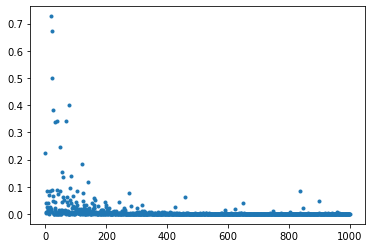

In [6]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
### importと関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

#### 確率勾配降下法

# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()




####  &emsp;&emsp; 4.3　確認テスト
####  &emsp;&emsp;&emsp;&emsp;確認テスト①　オンライン学習とは何か
####  &emsp;&emsp;&emsp;&emsp;解答：入ってい来るたびにパラメータを更新し学習を進めていく方法
####  &emsp;&emsp;&emsp;&emsp;確認テスト②　この数式の意味を図に書いて説明せよ。
####  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $W^{(t+1)} = w^{(t)} - \varepsilon \nabla E_t $

####  &emsp;&emsp; 4.4　関連記事

###  ５、Section5：誤差逆伝播法
####  &emsp;&emsp; 5.1　要点まとめ
####  &emsp;&emsp; &emsp; &emsp; 算出された誤差を、出力層側から順に微分し、前の層前の層へと伝播。
####  &emsp;&emsp;&emsp; &emsp;  最小限の計算で各パラメータでの微分値を解析的に計算する手法。
####  &emsp;&emsp; &emsp; &emsp; 微分の連鎖律を使って計算を効率化する。
####  &emsp;&emsp; &emsp; &emsp; 【誤差逆伝播法】算出された誤差を、出力層側から順に微分し、
####  &emsp;&emsp; &emsp; &emsp; 前の層前の層へと伝播。最小限の計算で各パラメータでの微分値を
####  &emsp;&emsp; &emsp; &emsp; 解析的に計算する手法
###  &emsp;数値微分でないやり方で更新量を求める方法。

####  &emsp;&emsp; &emsp; &emsp;それぞれの場所で起こるズレ（誤差）を重みの変更量を再利用する。
####  &emsp;&emsp; &emsp; &emsp;計算結果（=誤差）から微分を逆算することで、不要な再帰的計算を避けて微分を算出できる

## &emsp;&emsp;&emsp;変数x -> z -> y -> Eで　 $ \frac{\partial E }{\partial x}$を求めたい場合
## &emsp;&emsp;&emsp;微分の連鎖律から以下のように表すことが出来、
###  &emsp;&emsp; &emsp; &emsp;$ \frac{\partial E }{\partial x}$ = $ \frac{\partial E }{\partial y}$ $ \frac{\partial y }{\partial z}$ $ \frac{\partial z }{\partial x}$ 
###  &emsp;&emsp; &emsp; &emsp;$ \frac{\partial E }{\partial y}$ , $ \frac{\partial y }{\partial z}$ ,$ \frac{\partial z }{\partial x}$ を求めることで計算処理を減らすことが可能。

####  &emsp;&emsp; 5.2　実装演習結果と考察

*** 重み1 ***
[[ 0.65403106  1.28272463 -0.13811279  0.09962293 -1.58840794  1.55981848
   1.54297373  0.23981771  0.17304308 -0.03808786]
 [-0.33631292 -0.35314482  0.88616549 -0.02685319  0.9458007   1.28093674
   0.99115171  0.94102692  0.28773346 -2.21422562]]

*** 重み2 ***
[ 0.99510641  0.90708286 -0.84299866 -0.88166069 -0.13460493  0.12726088
  0.36382245  0.13650485  0.04559496 -0.57847811]

*** バイアス1 ***
[ 0.15709326 -0.91622269 -0.2086331   0.01213995  1.67774433  0.64321294
 -1.31686753  0.61185089  1.02312719  0.84023724]

*** バイアス2 ***
1.443195493590322


##### 誤差逆伝播開始 #####
*** 偏微分_重み1 ***
[[ 0.00701639  0.00647147 -0.0060013  -0.00628862 -0.00054348  0.00051108
   0.00259565  0.00075012  0.00023342 -0.00412708]
 [ 0.00932299  0.00859894 -0.0079742  -0.00835598 -0.00072215  0.00067909
   0.00344895  0.00099672  0.00031016 -0.00548384]]

*** 偏微分_重み2 ***
[0.02136247 0.         0.00914132 0.00301875 0.15554742 0.15634779
 0.         0.10270461 0.11647737 0.        ]

*** 偏微分_バイ

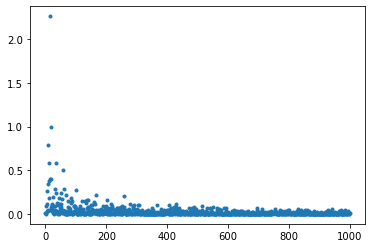

In [7]:
####  1_3_stochastic_gradient_descent.ipynb (ビデオ中で指定されたcode)
import sys
## sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

##    確率勾配降下法
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network


# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()


In [5]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

### importと関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

#### メインプログラム
# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))

    
    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####

##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[ 0.08706577 -0.08706577]]

*** 偏微分_dE/du2 ***
[[-0.02611973 -0.02611973 -0.02611973]]

*** 偏微分_重み1 ***
[[-0.02611973 -0.02611973 -0.02611973]
 [-0.13059866 -0.13059866 -0.13059866]]

*** 偏微分_重み2 ***
[[ 0.10447893 -0.10447893]
 [ 0.21766443 -0.21766443]
 [ 0.33084994 -0.33084994]]

*** 偏微分_バイアス1 ***
[-0.02611973 -0.02611973 -0.02611973]

*** 偏微分_バイアス2 ***
[ 0.08706577 -0.08706577]

##### 結果表示 #####
##### 更新後パラメータ #####
*** 重み1 ***
[[0.1002612  0.3002612  0.5002612 ]
 [0.20130599 0.40130599 0.60130599]]

*** 重み2 ***
[[0.09895521 0.40104479]
 [0.19782336 0.50217664]
 [0.2966915  0.6033085 ]]

*** バイアス1 ***
[0.1002612 0.2002612 0.3002612]

*** バイアス2 ***
[0.09912934 0.20087066]



####  &emsp;&emsp; 5.3　確認テスト
#####  &emsp;&emsp;&emsp;確認テスト① 誤差逆伝播法では不要な再帰的処理を避ける事が出来る。
#####  &emsp;&emsp;&emsp;&emsp;既に行った計算結果を保持しているソースコードを抽出せよ。
##### &emsp;&emsp;&emsp;解答：　 delta2 = functions.d_mean_squared_error(d, y)
##### &emsp;&emsp;&emsp;    # 出力層でのデルタ　誤差関数を微分したもの。
##### &emsp;&emsp;&emsp;    delta2 = functions.d_mean_squared_error(d, y)
##### &emsp;&emsp;&emsp;
#####  &emsp;&emsp;&emsp;確認テスト② 2つの空欄に該当するソースコードを探せ
##### &emsp;&emsp;&emsp;解答：
#### &emsp;&emsp;&emsp;$ \frac{\partial E }{\partial y}\frac{\partial y }{\partial u} $&emsp;&emsp; delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)
#### &emsp;&emsp;&emsp;$ \frac{\partial E }{\partial y}\frac{\partial y }{\partial u} \frac{\partial u }{\partial w_{ij} ^{(2)}}$&emsp;&emsp;grad['W1'] = np.dot(x.T, delta1)
